In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid")

# Load the dataset
df = pd.read_csv("Cost_of_Living_Index_2022.csv")

# Initial Inspection
print(df.head())

   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4           

In [23]:
#DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [24]:
# 1. Descriptive Statistics for the indices
index_columns = [
    'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
    'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index'
]
#Descriptive Statistics for Indices
print(df[index_columns].describe().T)

# 2. Top 10 Countries by Cost of Living Index
top_10_col = df.sort_values(by='Cost of Living Index', ascending=False).head(10)

# 3. Top 10 Countries by Local Purchasing Power Index
top_10_ppp = df.sort_values(by='Local Purchasing Power Index', ascending=False).head(10)

print("\n--- Top 10 Cost of Living Index ---")
print(top_10_col[['Country', 'Cost of Living Index']])
print("\n--- Top 10 Local Purchasing Power Index ---")
print(top_10_ppp[['Country', 'Local Purchasing Power Index']])

                                count       mean        std    min     25%  \
Cost of Living Index            139.0  50.188633  20.860222  19.92  34.715   
Rent Index                      139.0  19.291511  15.317726   2.72   9.515   
Cost of Living Plus Rent Index  139.0  35.705324  17.542523  12.09  23.310   
Groceries Index                 139.0  46.637842  20.952229  14.92  31.200   
Restaurant Price Index          139.0  43.444892  24.885969  12.41  25.290   
Local Purchasing Power Index    139.0  46.426259  26.921840   1.45  27.040   

                                  50%     75%     max  
Cost of Living Index            44.68  62.580  146.04  
Rent Index                      13.93  25.070   98.58  
Cost of Living Plus Rent Index  31.26  44.865  123.80  
Groceries Index                 40.22  56.590  148.66  
Restaurant Price Index          34.56  54.925  159.17  
Local Purchasing Power Index    37.22  66.105  118.44  

--- Top 10 Cost of Living Index ---
         Country  Cost o

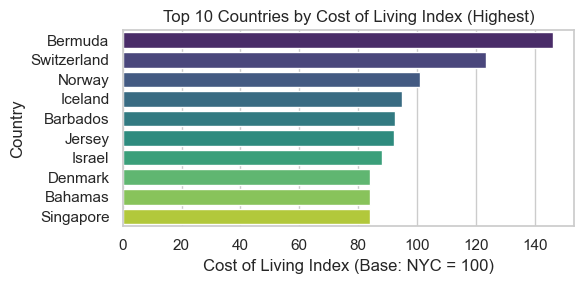

In [59]:
# 4. Visualization: Top 10 Cost of Living Index
plt.figure(figsize=(6, 3))
sns.barplot(
    x='Cost of Living Index',
    y='Country',
    data=top_10_col,
    palette='viridis'
)
plt.title('Top 10 Countries by Cost of Living Index (Highest)', fontsize=12)
plt.xlabel('Cost of Living Index (Base: NYC = 100)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
plt.close()

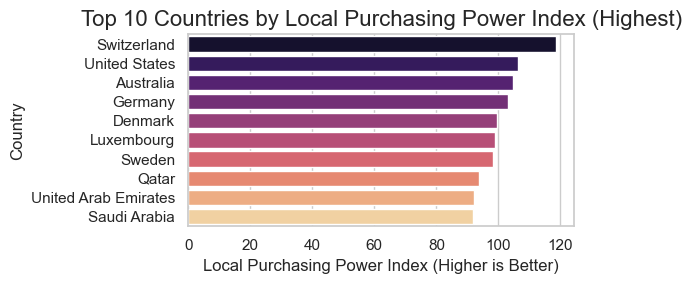

In [61]:
# 5. Visualization: Top 10 Local Purchasing Power Index
plt.figure(figsize=(6, 3))
sns.barplot(
    x='Local Purchasing Power Index',
    y='Country',
    data=top_10_ppp,
    palette='magma'
)
plt.title('Top 10 Countries by Local Purchasing Power Index (Highest)', fontsize=16)
plt.xlabel('Local Purchasing Power Index (Higher is Better)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
plt.close()

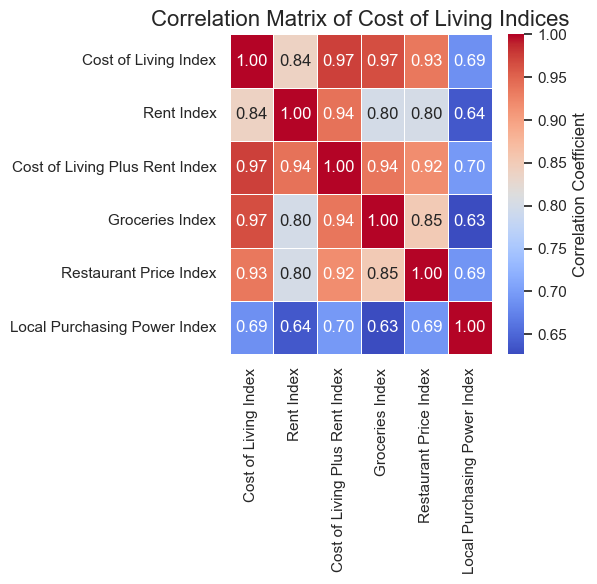

In [65]:
# 6. Correlation Matrix
corr_matrix = df[index_columns].corr()

# Visualization: Correlation Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Cost of Living Indices', fontsize=16)
plt.tight_layout()
plt.show()
plt.close()

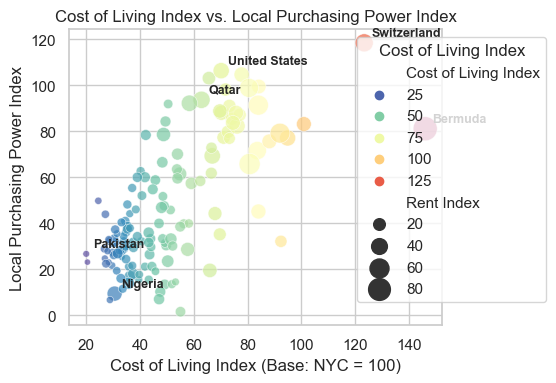

In [69]:
# 7. Scatter plot: Cost of Living Index vs. Local Purchasing Power Index
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Cost of Living Index',
    y='Local Purchasing Power Index',
    data=df,
    hue='Cost of Living Index', # Color by Cost of Living Index
    size='Rent Index', # Size by Rent Index to show its influence
    sizes=(20, 300),
    palette='Spectral_r',
    alpha=0.7
)

# Annotate some extreme points
extreme_countries = ['Bermuda', 'Switzerland', 'Pakistan', 'Nigeria', 'United States', 'Qatar']
for country in extreme_countries:
    row = df[df['Country'] == country].iloc[0]
    plt.annotate(
        row['Country'],
        (row['Cost of Living Index'], row['Local Purchasing Power Index']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Cost of Living Index vs. Local Purchasing Power Index', fontsize=12)
plt.xlabel('Cost of Living Index (Base: NYC = 100)')
plt.ylabel('Local Purchasing Power Index')
plt.legend(title='Cost of Living Index', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

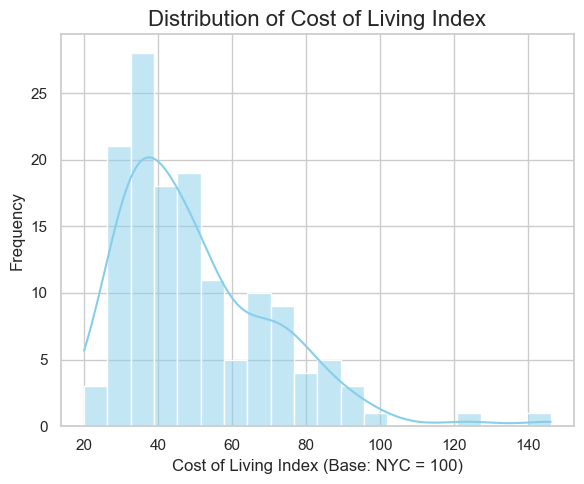

In [71]:
#Distribution Analysis (Cost of Living Index) 

# Histogram
plt.figure(figsize=(6, 5))
sns.histplot(df['Cost of Living Index'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Cost of Living Index', fontsize=16)
plt.xlabel('Cost of Living Index (Base: NYC = 100)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.close()

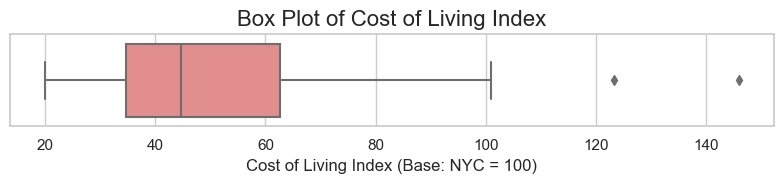

In [30]:
# Box Plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Cost of Living Index'], color='lightcoral')
plt.title('Box Plot of Cost of Living Index', fontsize=16)
plt.xlabel('Cost of Living Index (Base: NYC = 100)')
plt.tight_layout()
plt.show()
plt.close()

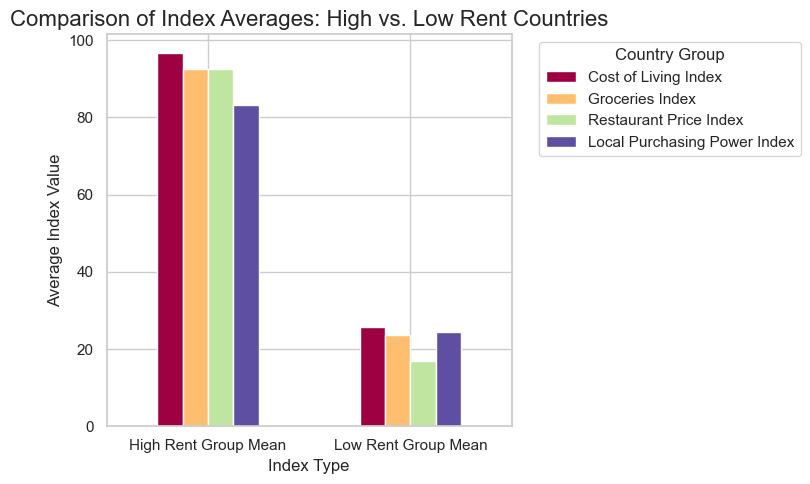


--- High Rent Countries (Top 5) ---
        Country  Rent Index
15      Bermuda       98.58
49    Hong Kong       74.57
109   Singapore       66.43
62       Jersey       65.33
72   Luxembourg       60.09

--- Low Rent Countries (Bottom 5) ---
        Country  Rent Index
0   Afghanistan        2.72
92     Pakistan        3.91
84        Nepal        3.96
10   Bangladesh        4.42
2       Algeria        4.59

--- Comparison of Index Averages (High vs. Low Rent Groups) ---
                      Cost of Living Index  Groceries Index  \
High Rent Group Mean                96.650           92.418   
Low Rent Group Mean                 25.716           23.682   

                      Restaurant Price Index  Local Purchasing Power Index  
High Rent Group Mean                  92.472                        83.226  
Low Rent Group Mean                   16.908                        24.512  


In [81]:
# Identify the extreme groups (Top 5 and Bottom 5)
high_rent_countries = df.sort_values(by='Rent Index', ascending=False).head(5)
low_rent_countries = df.sort_values(by='Rent Index', ascending=True).head(5)

# Calculate means for comparison
comparison_cols = [
    'Cost of Living Index', 'Groceries Index', 'Restaurant Price Index',
    'Local Purchasing Power Index'
]

high_rent_mean = high_rent_countries[comparison_cols].mean()
low_rent_mean = low_rent_countries[comparison_cols].mean()

comparison_df = pd.DataFrame({
    'High Rent Group Mean': high_rent_mean,
    'Low Rent Group Mean': low_rent_mean
}).T

# Visualization for comparison
comparison_df.plot(kind='bar', figsize=(8, 5), rot=0, colormap='Spectral')
plt.title('Comparison of Index Averages: High vs. Low Rent Countries', fontsize=16)
plt.ylabel('Average Index Value')
plt.xlabel('Index Type')
plt.legend(title='Country Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

print("\n--- High Rent Countries (Top 5) ---")
print(high_rent_countries[['Country', 'Rent Index']])
print("\n--- Low Rent Countries (Bottom 5) ---")
print(low_rent_countries[['Country', 'Rent Index']])
print("\n--- Comparison of Index Averages (High vs. Low Rent Groups) ---")
print(comparison_df)